In [ ]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import time 
import random
from tqdm import tqdm

def gerador(min=1, max=5, x=1): 
    if x==1: 
        return float(random.uniform(min, max))
    else:
        lista = np.empty((x))
        for i in (range(x)): 
            lista[i]=(float(random.uniform(min, max)))
        return lista

it = int(1e5)
S = gerador(0.5, 1.5, it)
b = gerador(1.5, 2.5, it)
Af = gerador(0.2, 1, it)
CLn = gerador(1.3, 1.87, it)
CLmax = gerador(1.3, 1.87, it)
c = gerador(0.2, 0.8, it)
h = gerador(0.05, 0.35, it)

z = []
for x in tqdm(range(it)):
    z.append(zb.Airplane(S=S[x], b=b[x], Af=Af[x], CLn=CLn[x], c=c[x], z=h[x]))



In [ ]:
df = pd.DataFrame()

y = np.zeros((len(S)))
v_stall = np.zeros((len(S)))
v_to = np.zeros((len(S)))
AR = np.zeros((len(S)))
WS = np.zeros((len(S)))
TW = np.zeros((len(S)))

for i in tqdm(range(len(y))):
     y[i] = z[i].takeOff_Distance_EDO()
     v_stall[i] = z[i].Vstall
     v_to[i] = z[i].Vlo
     AR[i] = z[i].AR
     WS[i] = z[i].WS
     TW[i] = z[i].TW

df['Área da asa'] = S
df['Envergadura'] = b
df['Afilamento'] = Af
df['Alongamento'] = AR
df['CL natureza'] = CLn
df['CL Max'] = CLmax
df['corda média'] = c
df['Distância TO'] = y
df['Altura'] = h
df['W/S'] = WS
df['T/W'] = TW
df['Veloc. stall'] = v_stall
df['Veloc. TO'] = v_to

df.to_excel('D:/dados_aviões_geradores.xlsx')
df.sample(3)

In [ ]:
df.columns

In [ ]:
df.corr()*100

In [ ]:
df.iloc[df.idxmin()['Distância TO']]

In [ ]:
filtro = df[df['Envergadura'] < 2]
filtro.sample(3)

In [ ]:
import seaborn as sns

#df = pd.read_excel('D:/dados_aviões_geradores.xlsx')

sns.pairplot(data=df['Distância TO'], corner=True, kind='reg')

In [ ]:
import seaborn as sns

sns.pairplot(data=df, corner=True)

In [ ]:
df = pd.read_excel('D:/dados_aviões_geradores.xlsx')

sns.pairplot(data=df)

In [ ]:
df.iloc[df.idxmin()['distances']]

In [32]:
import ZebraLib as zb
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_excel('D:/dados_aviões_geradores.xlsx')

In [12]:
df = df.drop(columns='Unnamed: 0')
df.sample(3)

,Área da asa,Envergadura,Afilamento,Alongamento,CL natureza,CL Max,corda média,Distância TO,Altura,W/S,T/W,Veloc. stall,Veloc. TO
13262,0.961012,2.271548,0.694095,5.369265,1.714806,1.462142,0.767203,26.861208,0.167759,85.747072,0.127889,10.182581,12.219098
23558,0.617156,1.997752,0.766523,6.466784,1.792317,1.473366,0.674182,48.821505,0.053338,133.522230,0.199144,12.706473,15.247768
43808,0.757146,1.887905,0.615838,4.707393,1.467659,1.663263,0.598486,34.431799,0.247136,108.834957,0.162323,11.471823,13.766188


In [13]:
df.iloc[df.idxmin()['Distância TO']]

Área da asa      1.497191
Envergadura      2.482186
Afilamento       0.207797
Alongamento      4.115206
CL natureza      1.309869
CL Max           1.641949
corda média      0.544039
Distância TO    14.195453
Altura           0.277501
W/S             55.039087
T/W              0.082089
Veloc. stall     8.158003
Veloc. TO        9.789603
Name: 37747, dtype: float64

In [31]:
f = df[ (df['Envergadura'] <= 2) & 
        (df['Área da asa'] <= 1) &
        (df['T/W'] >= 0.15)]

n  = f.idxmin()['Distância TO']

df.iloc[n]

Área da asa       0.819206
Envergadura       1.970291
Afilamento        0.577545
Alongamento       4.738794
CL natureza       1.301107
CL Max            1.716449
corda média       0.323489
Distância TO     28.457588
Altura            0.090824
W/S             100.590105
T/W               0.150027
Veloc. stall     11.028739
Veloc. TO        13.234487
Name: 93163, dtype: float64

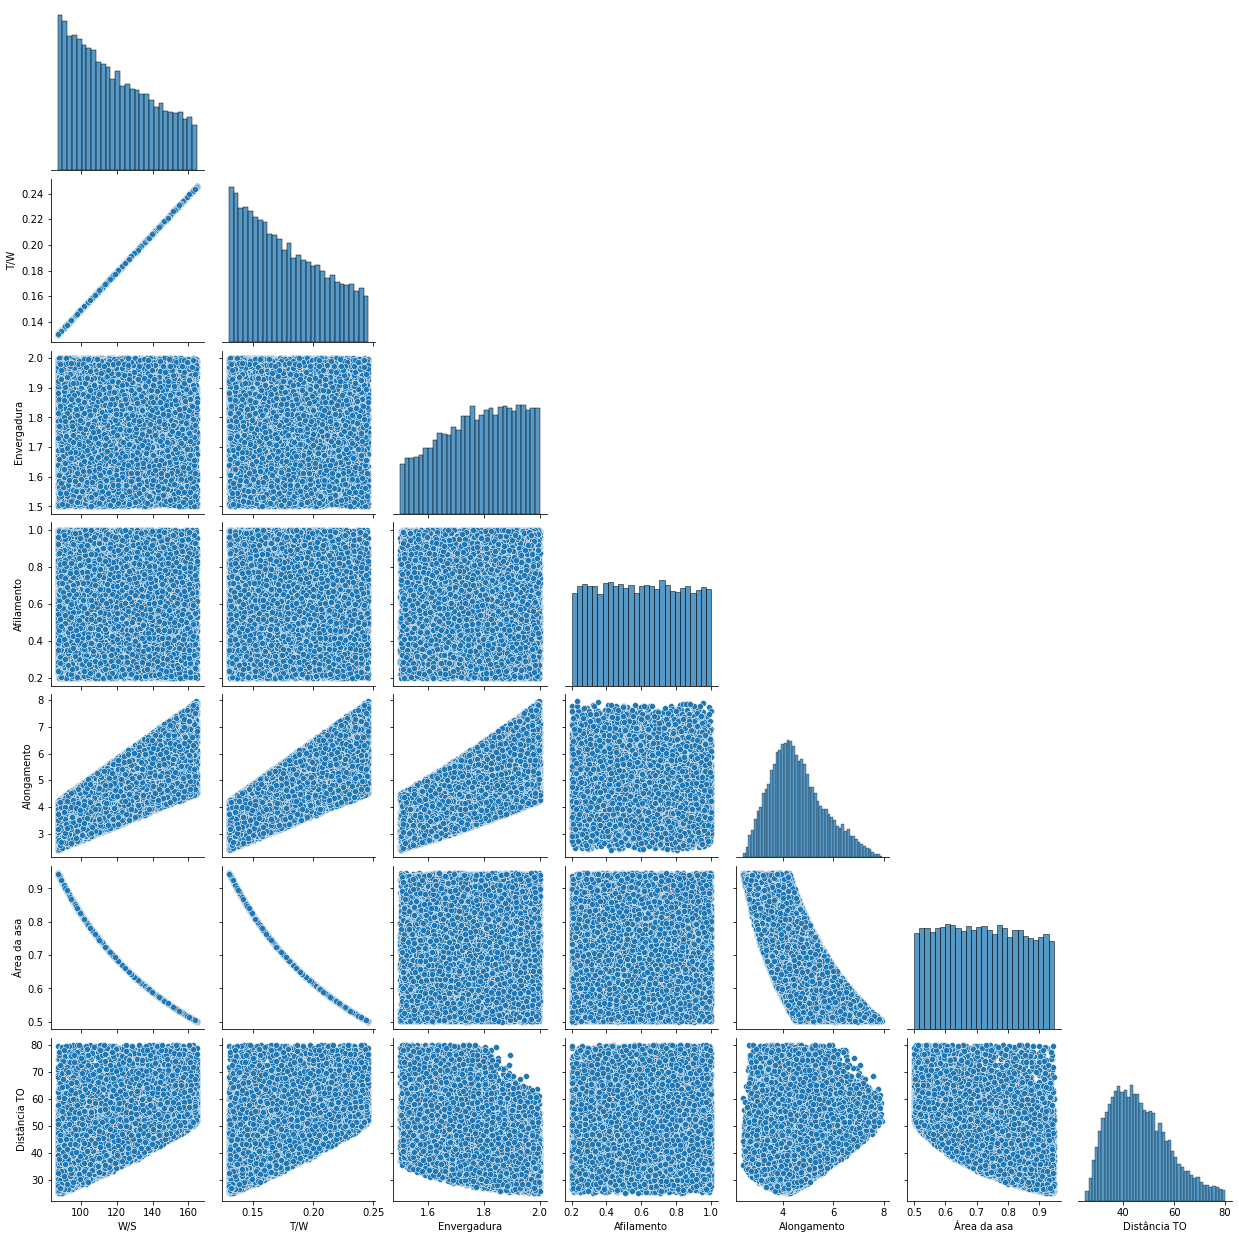

In [51]:
f = df[ (df['Envergadura'] <= 2) & 
        (df['Área da asa'] <= 1) &
        (df['W/S'] >= 80) &
        (df['Distância TO'] <= 80) &
        (df['T/W'] >= 0.13)]

sns.pairplot(data=f[['W/S', 'T/W', 'Envergadura', 'Afilamento', 'Alongamento','Área da asa', 'Distância TO']], corner=True)

In [52]:
f[['W/S', 'T/W', 'Envergadura', 'Afilamento', 'Alongamento','Área da asa', 'Distância TO']].corr()

,W/S,T/W,Envergadura,Afilamento,Alongamento,Área da asa,Distância TO
W/S,1.000000,1.000000,-0.030314,0.001588,0.757577,-0.986557,0.583509
T/W,1.000000,1.000000,-0.030314,0.001588,0.757577,-0.986557,0.583509
Envergadura,-0.030314,-0.030314,1.000000,0.002495,0.618570,0.036265,-0.391422
Afilamento,0.001588,0.001588,0.002495,1.000000,0.003986,-0.000896,0.024279
Alongamento,0.757577,0.757577,0.618570,0.003986,1.000000,-0.743636,0.201503
Área da asa,-0.986557,-0.986557,0.036265,-0.000896,-0.743636,1.000000,-0.568114
Distância TO,0.583509,0.583509,-0.391422,0.024279,0.201503,-0.568114,1.000000


In [61]:
import ZebraLib as zb

Zb = zb.Airplane(Load=9)
Zb.takeOff_Distance_EDO(rho=zb.alt2rho(1212)) + Zb.hdist_Obstacle(rho=zb.alt2rho(1212) )

124.24634429981883

In [73]:
def resid(x, args):
    Zb = zb.Airplane(Load=x)
    H = Zb.takeOff_Distance_EDO(rho=zb.alt2rho(1212)) + Zb.hdist_Obstacle(rho=zb.alt2rho(1212) )
    print(f'Carga: {Zb.Load} --- {H}m --- {H-60}')
    return H - 60

zb.robustNewton(resid, (2))[0]

Carga: 2 --- 17.75146914173063m --- -42.24853085826937
Carga: 2.00000002 --- 17.751469122595964m --- -42.248530877404036
Carga: 0.6200265971486352 --- 11.550970354164768m --- -48.44902964583523
Carga: 0.6200266033489011 --- 11.550970352558618m --- -48.44902964744138
Carga: 0.2547344524831396 --- 10.266565620869171m --- -49.73343437913083
Carga: 0.2547344550304841 --- 10.266565620579774m --- -49.733434379420224
Carga: 0.04098144487577318 --- 9.42215367367898m --- -50.57784632632102
Carga: 0.04098144528558763 --- 9.422153673679327m --- -50.577846326320675
Carga: 59533.52717044804 --- 912.2089804415176m --- 852.2089804415176
Carga: 59533.52776578331 --- 912.2089850054907m --- 852.2089850054907
Carga: 3951.465989768658 --- 235.09294310316363m --- 175.09294310316363
Carga: 3951.4660292833178 --- 235.09294427772613m --- 175.09294427772613
Carga: 1006.2254835507338 --- 118.75943688487415m --- 58.75943688487415
Carga: 1006.2254936129885 --- 118.75943747693155m --- 58.75943747693155
Carga: 7.58

55.436121033301475

In [70]:
Zb.takeOff_Distance_EDO(rho=zb.alt2rho(1212)) + Zb.hdist_Obstacle(rho=zb.alt2rho(1212) )


124.24634429981883